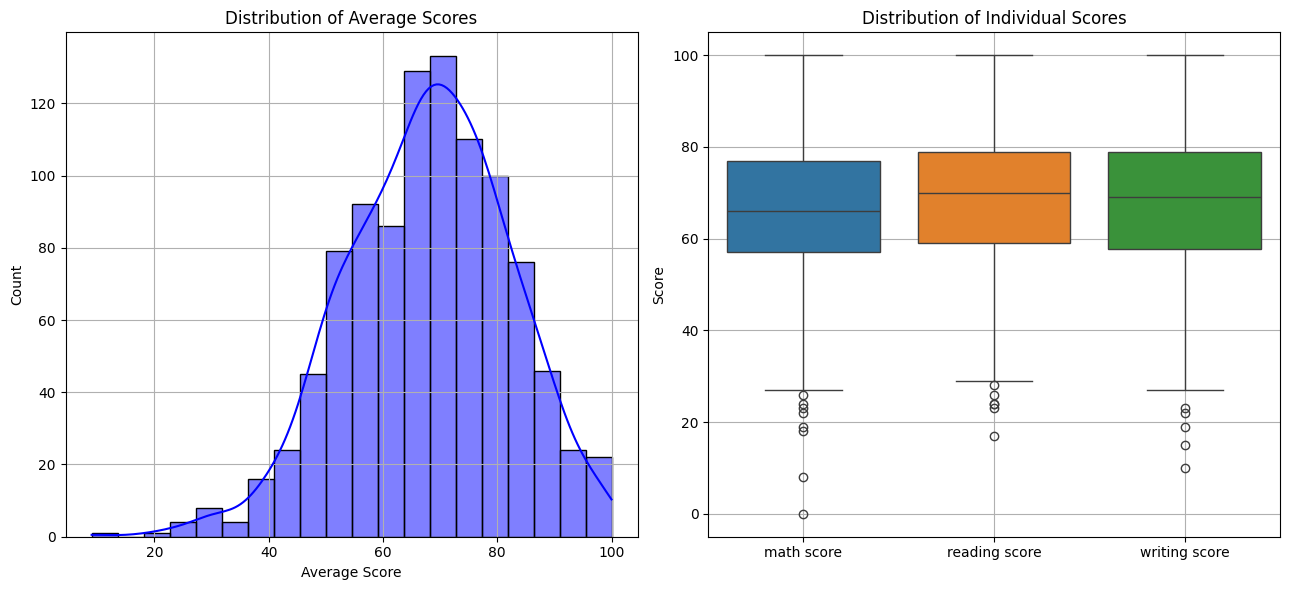

Model Evaluation:
Mean Squared Error (MSE): 181.16
R-squared (R²): 0.17


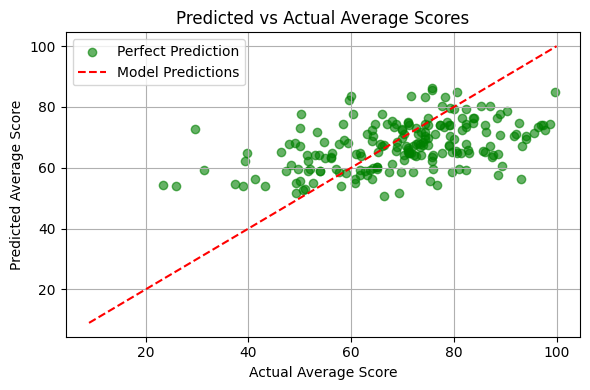

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv(r'C:\Users\DELL\students-performance\StudentsPerformance.csv')

# find the value of avarage score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Save the original scores for plotting 
original_scores = df[['math score', 'reading score', 'writing score']].copy()

# drop the individual scores
df = df.drop(["math score", "reading score", "writing score"], axis=1)

# visualize the distribution of average scores
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['average_score'], kde=True, color='blue', bins=20)
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.grid(True)

# Boxplot of original scores
plt.subplot(1, 2, 2)
sns.boxplot(data=original_scores)
plt.title("Distribution of Individual Scores")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

# split the data into features and target variable
X = df.drop('average_score', axis=1)
y = df['average_score']

# Polynomial features to capture non-linear relationships
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=132)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict the average scores on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Plotting the predicted vs actual average scores
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Predicted vs Actual Average Scores")
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.grid(True)
plt.legend(['Perfect Prediction', 'Model Predictions'])
plt.tight_layout()
plt.show()